

Let $P$ be a pair of pants and choose orientations
with a pair of distinct  boundary geodesics $\alpha,\beta$.

We choose orientations on $\alpha,\beta$ such that the product $\alpha\beta \in \pi_1(P)$
represents a figure of 8 curve and not the other boundary component.

The abelianization of $\pi_1(P)$ is a free abelian on 2 generators
and we can choose these to be the images of $\alpha,\beta$ 
which we will denote....

For a pair of elements $a,b$ in a free abelian group 
we define the cone generated by $a,b$ to be the set 
$\{ ma + nb, m,n \in \mathbb{N}\}$.


**Theorem** The hyperbolic length function is concave on the cone generated by $\alpha,\beta$.

There is a semigroup generated by the automorphisms

$t_\alpha : (\alpha,\beta) \mapsto (\alpha,\alpha\beta)$
$t_\beta : (\alpha,\beta) \mapsto (\alpha\beta, \beta)$ 


## Notes etc.


Stern Brocot tree

https://arxiv.org/pdf/0802.0547.pdf


This is relevant  as it gives length estimates but not the convexity...

https://arxiv.org/pdf/1506.03633.pdf



Any primitive geodesic on 
$\mathbb{H}^2/G$ 
will invariably have a number of self intersections 
on the images of the half-turn lines. 
following Gilman these are so-called essential self-intersections. 
All other self-intersections are self-intersections
that will be undone when we do surgery at some essential self intersection.
Gilman calls these trailing intersections. 

In the figure the three half turn lines are dotted
and there is a figure eight curve with a single self intersection 
which is essential.

![](../heart_curves_pants.svg)

## References

https://blogs.ams.org/visualinsight/2016/02/15/27-lines-on-a-cubic-surface/


https://blogs.ams.org/visualinsight/2016/08/15/cayleys-nodal-cubic-surface/

https://arxiv.org/abs/math/0210333

D. R. Heath-Brown
(Submitted on 21 Oct 2002)
The Cayley cubic surface is given by the equation sum_{i=1}^4 X_i^{-1}=0. We show that the number of non-trivial primitive integer points of size at most B is of exact order B(log B)^6, as predicted by Manin's conjecture.


https://arxiv.org/abs/math/0507118


The automorphism groups of the 

- 27 lines on the smooth cubic surface 
- 28 bitangents to the general quartic plane curve 

are well-known to be closely related to the Weyl groups of E_6 and E_7. 

We show how classical subconfigurations of lines, such as 
- double-sixes
- triple systems
- Steiner sets, 

are easily constructed from certain models of the exceptional Lie algebras. 

For e_7 and e_8 we are lead to beautiful models graded over the octonions, 
which display these algebras as plane projective geometries of subalgebras. 

We also interpret the group of the bitangents as a group of transformations of the triangles in the Fano plane, 
and show how this allows to realize the isomorphism 

$PSL(3,\mathbb{F}_2)≃PSL(2,\mathbb{F}_7)$
in terms of harmonic cubes.

https://arxiv.org/pdf/1706.06712.pdf

Amit Ghosh, Peter Sarnak

For integers k, we consider the affine cubic surface Vk given by M(x)=x21+x22+x23−x1x2x3=k. We show that for almost all k the Hasse Principle holds, namely that Vk(Z) is non-empty if Vk(Zp) is non-empty for all primes p, and that there are infinitely many k's for which it fails. The Markoff morphisms act on Vk(Z) with finitely many orbits and a numerical study points to some basic conjectures about these "class numbers" and Hasse failures. Some of the analysis may be extended to less special affine cubic surfaces.


**ie they are looking for level sets with some integer points**


https://arxiv.org/pdf/1603.06267.pdf

http://annals.math.princeton.edu/articles/15474

**An asymptotic formula for integer points on Markoff-Hurwitz varieties**

*Alex Gamburd, Michael Magee, Ryan Ronan*

**Abstract**
We establish an asymptotic formula for the number of integer solutions to the Markoff-Hurwitz equation

$x^2_1+x^2_2+…+x^2_n=a x_1 x_2… x_n+k.$

When n≥4 the previous best result is by Baragar (1998) that gives an exponential rate of growth with exponent β that is not in general an integer when n≥4. We give a new interpretation of this exponent of growth in terms of the unique parameter for which there exists a certain conformal measure on projective space.

## Thesis


https://pdfs.semanticscholar.org/3b83/d68913a304781594b0576f196425710c189a.pdf


Counting one sided simple closed geodesics on Fuchsian thrice punctured projective planes

https://arxiv.org/abs/1705.09377


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:

def R(v):
    X,Y,Z = v
    return X, X*Y - Z, Y

def L(v):
    X,Y,Z = v
    return  Y*X - Z, Y, X

class Triple():
    def __init__(self, 
                 nums=(3,3,3),
                 basis=np.identity(2) ):
        self.nums = nums
        self.vecs = basis
        
    def R(self):
        X,Y,Z = self.nums
        V = self.vecs
        return Triple(nums=(X, X*Y - Z, Y), 
                      basis=np.dot(np.array([[1,1],[1,0]]),V)
                     )
        
    def L(self):
        X,Y,Z = self.nums
        V = self.vecs
        return Triple(nums=(Y*X - Z, Y, X), 
                      basis=np.dot(np.array([[1,0],[1,1]]),V) 
                     )
    
    def __repr__(self):
        return str(self.nums)

    
class Triple():
    def __init__(self, 
                 nums=(3,3,3),
                 basis=( np.array([1,0]), np.array([0,1]))
                ):
        self.nums = nums
        self.vecs = basis
        
    def R(self):
        X,Y,Z = self.nums
        V = self.vecs
        return Triple(nums=( X, X*Y - Z, Y), 
                      basis=( V[0], V[0]+V[1])
                     )
        
    def L(self):
        X,Y,Z = self.nums
        V = self.vecs
        return Triple(nums=( Y*X - Z, Y, X), 
                      basis=( V[0]+V[1], V[1]) 
                     )
    
    def __repr__(self):
        return str(self.nums)


class IterTree(object):
    #this is a list of lists one at each depth in the tree
    def __init__(self, max_size=1000):
        self.max = max_size
        self.triples = [ ]
    
    def make(self,v,d=0):
        
        self.triples.append(v)
        d +=1
        if d > 5: return
        if max(v.nums) < self.max and min(v.nums) > -self.max:
            self.make(v.L(),d=d)
            self.make(v.R(), d=d)
        return
    

In [9]:


basis = ( np.array([1,0]), np.array([0,1]) )

root = Triple(nums=(3,1,-2),basis=basis)
mark = IterTree(max_size= 5000)
mark.make(root)

In [11]:
mark.triples[:5]

[(3, 1, -2), (5, 1, 3), (2, 1, 5), (-3, 1, 2), (-5, 1, -3)]

# The different types of generator

$\text{tr} X = 0 \Rightarrow X$ is an element of order 2
and the Dehn twist (Nielsen transformation) 
https://en.wikipedia.org/wiki/Nielsen_transformation

$(x,y,z) \mapsto ( xy - z, y, x)$

is order 4 so we get a cycle in the Markoff numbers:

$(4, 0, 2) \rightarrow (-2, 0, 4) \rightarrow  (-4, 0, -2) \rightarrow (2, 0, -4) \rightarrow  (4, 0, 2)$

$\text{tr} X = 0 \Rightarrow X$ is a parabolic element 
and the Dehn twist (?? move) is infinite order and 
we get an arithemetic progression:

$4, 2, 0)\rightarrow (8, 2, 4)\rightarrow (12, 2, 8)\rightarrow (16, 2, 12)\rightarrow (20, 2, 16)\rightarrow (24, 2, 20) \ldots$


So to count the integer points in this orbit we should count the integer points
inside a wedge which is a fundamental domain in $\mathbb{R}^2$
for the action of the action of the Dehn twist round the "curve which is order 4".

There are "trivial" integer solutions which are on the 6 lines 
where one of the coordinates is $\pm 2$. 
These give rise to arithemetic sequences 
where the difference between consecutive terms is 4.

This is easy to see from:

$ 2^2 + y^2 + z^2 - 2yz = 2 + 18 \Leftrightarrow (y - z)^2 = 16 $

and then there are 3 possible minimal integer solutions (up to sign change and permutation)

- $(y,z) = (4,0)$
- $(y,z) = (2,-2)$
- $(y,z) = (3,-1)$





In [10]:
nums = []
#this is 2,2,-2 reparametrised
nn = plot_fig(2,2,6,asp_rat=1)

NameError: name 'plot_fig' is not defined

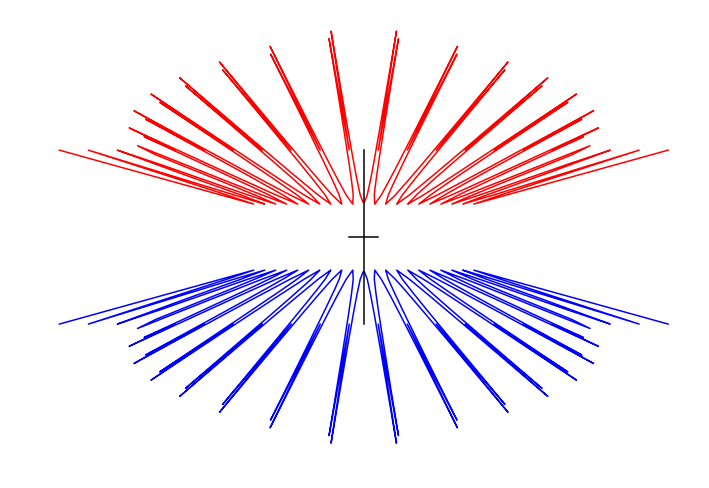

In [13]:
nums = []

nn = plot_fig(0,4,2,asp_rat=6)

in the figure the Dehn twist along the order 4 element 
corresponds to a transvection $(x,y) \mapsto (x, x+y)$
so we see an infinite "periodic" band appearing.

Note that between spikes the boundary is concave.

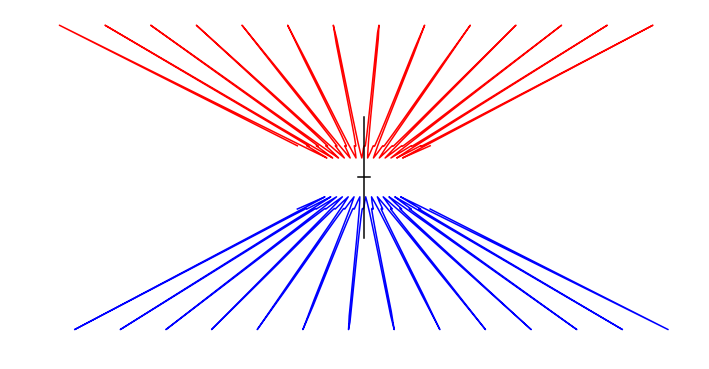

In [152]:
nums = []

nn = plot_fig(1,-3,2, asp_rat=10)

In this figure the Dehn twist along the order 6 element (ie trace = 1)
corresponds to the transvection $(x,y) \mapsto (x, x+y)$
so we see an infinite "periodic" band appearing. 

The period is different and this is easy to see in the figure:

$(3,1,-2) \rightarrow  (5,1,3) \rightarrow (2,1,5) \rightarrow (-3, 1, 2) \ldots  \rightarrow (3,1,-2)$

The figure is not horizontally symmetric and there is a defect from concavity.


In [147]:
nums.sort(key=lambda z : abs(z.m2v()[1]) )
[(x.v,x) for x in nums[:10]]

[(array([-19,   1]), -5),
 (array([-16,   1]), 5),
 (array([-13,   1]), -5),
 (array([-10,   1]), 5),
 (array([-7,  1]), -5),
 (array([-4,  1]), 5),
 (array([-1,  1]), -5),
 (array([2, 1]), 5),
 (array([5, 1]), -5),
 (array([8, 1]), 5)]

In [17]:
import matplotlib.pyplot as plt

In [45]:
root = Triple(nums=(2.1,2.01,-2.01),basis=basis)
mark = IterTree(max_size= 5000)
mark.make(root)

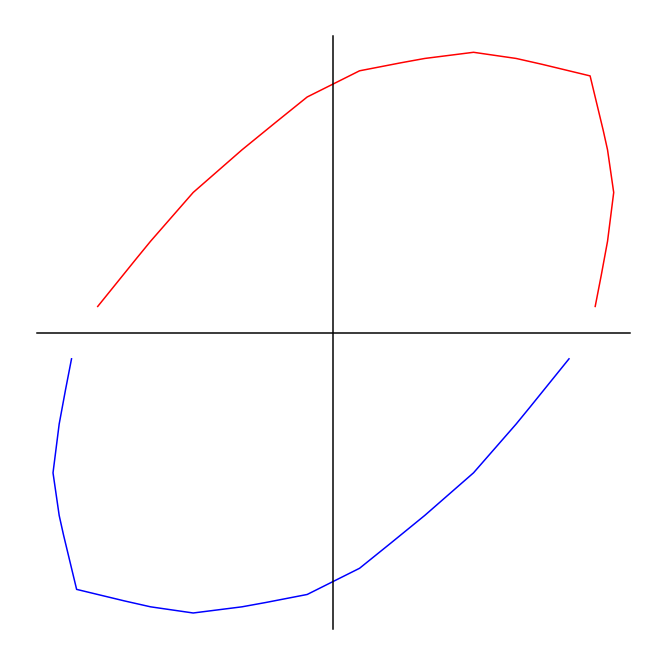

In [166]:
def acosh(u, default=.5):
    #this will take complex numbers
    u = abs(u**3  -  3*u )
    if abs(u**2 - 4) < .0001: return default
    
    return np.log( .5*(u + np.sqrt(u**2 - 4))) /5

nums = []
nn = plot_fig(3.,3.,3.)

In [133]:
class Markoff(object):
    
    def __init__(self, mn = (3., np.array([1,0]))):
        self.n, self.v = mn
    
    #this is cheating as it breaks the symetry 
    #between + and - 
    #but the subsequent code looks better
    
    def __mul__(self, other):
        return Markoff((self.n*other.n, self.v + other.v))
    
    def __sub__(self, other):
        return Markoff((self.n - other.n, self.v))
    
    def __abs__(self):
        return abs(self.n)
    
    def m2v(self):
        #this is a dumb name for a function
        #print(self.n**2)
        length = acosh(self.n)
   
        return self.v/length
        
    def __str__(self):
        return str(self.n)
    
    def __repr__(self):
        return repr(self.n)

In [147]:
# these two are global to tree()
max_depth = 10000
nums = []
# but who cares?

def tree(mt, dd):
    global nums
    dd +=1
    x,y,z = mt
    nums.append(z)
    if abs(z) > max_depth or dd > 20:
        return
    tree((z,y,y*z - x), dd)
    tree((x,z,x*z - y), dd)



nums  = []

def plot_fig(a=3.,b=3.,c=3., asp_rat=1):
    
    x = Markoff((a, np.array([1,0]) ))
    y = Markoff((b, np.array([0,1]) ))
    z = Markoff((c, np.array([1,1]) ))
    
    tree((x,y,z), dd=0)
    x = Markoff((a, np.array([-1,0]) ))
    z = Markoff((a*b-c, np.array([-1,1]) ))
    tree((x,y,z), dd=0)
    
    nums.sort(key=lambda x: np.arctan2(x.v[0],x.v[1]))
    TT = [ n.m2v() for n in nums]
    #TT = [v for v in TT if np.linalg.norm(v) < 20]
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.set_aspect(asp_rat) 
    ax.axis('off')
    XS, YS = zip(*TT)
    ax.plot(XS,YS,'r-')
    TT = [ -v for v in TT]
    XS, YS = zip(* TT)
    ax.plot(XS,YS,'b-')

    XS,YS = [0,0], [-2,2]
    ax.plot(XS,YS,'k')
    ax.plot(YS,XS,'k')
    return nums

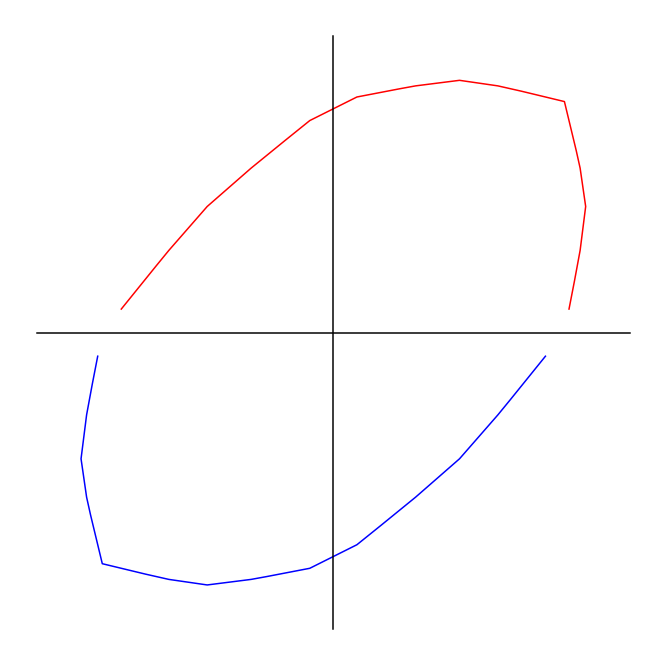

In [131]:
nums = []
nn = plot_fig(3.,3.,3.)

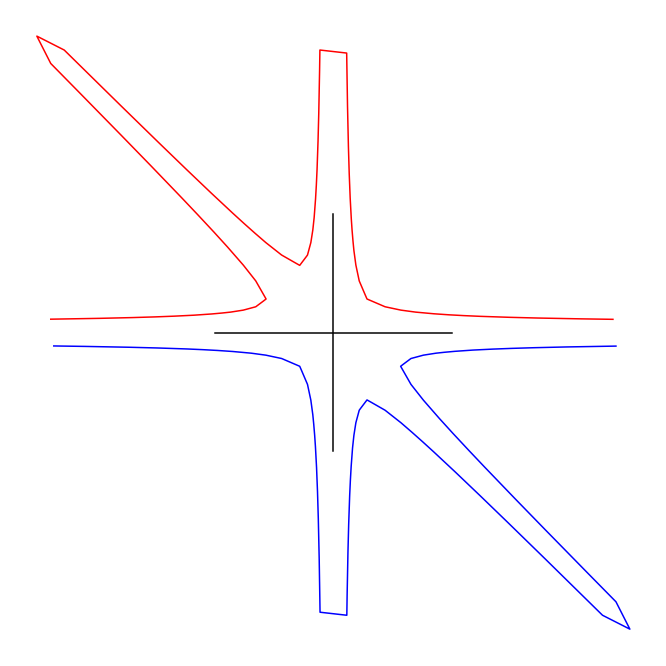

In [8]:
def acosh(u, default=.2):
    #this will take complex numbers
    u = abs(u)
    if abs(u**2 - 4) < .0001: return default
    return np.log( .5*(u + np.sqrt(u**2 - 4)))

nums = []

nn = plot_fig(2,2,6,asp_rat=1)

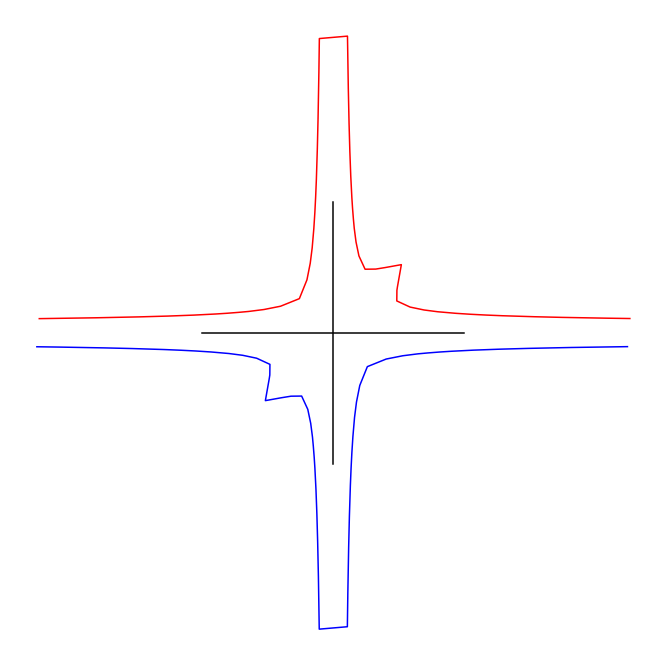

In [9]:
nums = []

nn = plot_fig(2,2,-3, asp_rat=1)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

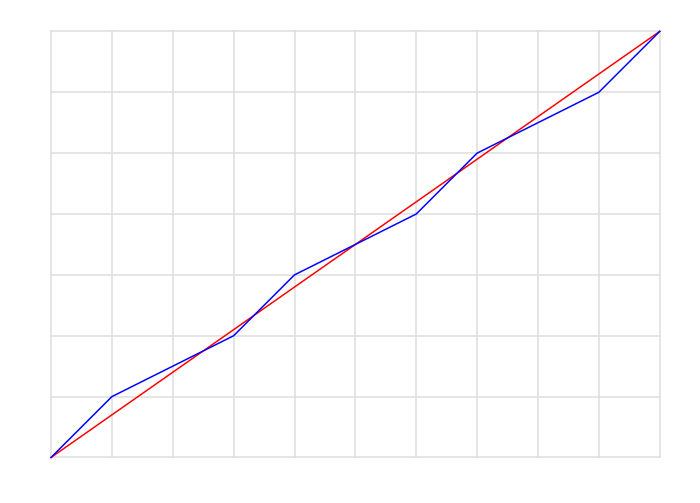

In [2]:
ww = 10
tics = np.linspace(0,ww, ww + 1)
grid_col = '#DDDDDD'

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.set_aspect(1) 
ax.axis('off')
for t in tics:
    X, Y = [0,ww], [t,t]
    if t < 8:
        ax.plot(X,Y, grid_col)
    X = [0,7]
    ax.plot(Y,X, grid_col)
 
X, Y = [0,10], [0,7]
ax.plot(X,Y,'r')

X, Y = [0,10], [0,7]
#ax.plot(X,Y,'r')
X, Y = [0,7,10], [0,5,7]
#ax.plot(X,Y,'b')
X, Y = [0,1,3,4,6,7,9,10], [0,1,2, 3,4,5,6,7]
ax.plot(X,Y,'b')
X, Y = [0,1,4,6,7,9,10], [0,1, 3,4,5,6,7]
#ax.plot(X,Y,'g')

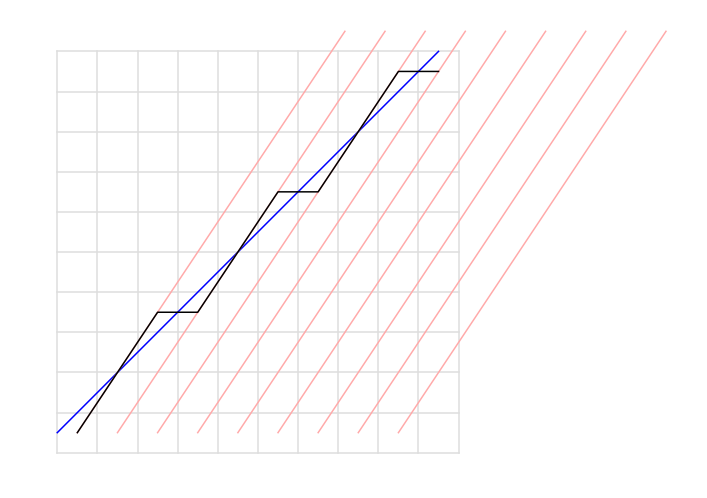

In [46]:
ww = 10
tics = np.linspace(0,ww, ww + 1)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.set_aspect(1) 
ax.axis('off')
for t in tics:
    X, Y = [0,ww], [t,t]
    ax.plot(X,Y, grid_col)
    ax.plot(Y,X, grid_col)
 
X, Y = [0,9.5], [.5,10]
ax.plot(X,Y,'b')

for t in range(0,9):
    X, Y = np.array([t,t+ ww*2/3]), [.5, ww +.5]
    X = X + .5
    ax.plot(X,Y,'#FFAAAA')
    
    
cc = np.array([.5,.5])
a =  np.array([1,0])
b = np.array([2,3])
pp = []
while cc[0] < ww:
    pp.append(tuple(np.copy(cc)))
    if int(cc[0] + 1) < cc[1]:
        cc += a
    else:
        cc += b
        
X,Y = zip(* pp)
ax.plot(X,Y,'k')



In [38]:
cc = np.array([.5,.5])
a =  np.array([1,0])
b = np.array([1,2])
pp = []
for x in range(ww):
    pp.append(tuple(np.copy(cc)))
    if x + 1 > cc[1]:
        cc += b
    else:
        cc += 1
    


[(0.5, 0.5),
 (1.5, 2.5),
 (2.5, 3.5),
 (3.5, 4.5),
 (4.5, 5.5),
 (5.5, 6.5),
 (6.5, 7.5),
 (7.5, 8.5),
 (8.5, 9.5),
 (9.5, 10.5)]

[array([1.5, 2.5]),
 array([2.5, 3.5]),
 array([3.5, 4.5]),
 array([4.5, 5.5]),
 array([5.5, 6.5]),
 array([6.5, 7.5]),
 array([7.5, 8.5]),
 array([8.5, 9.5]),
 array([ 9.5, 10.5]),
 array([10.5, 11.5])]